In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mygraph as mg
%matplotlib inline

In [2]:
df = pd.read_csv('lamp.csv', sep='\t')
print( df.head() )
W = df['V'] * df['I']
W

   t_pir, C     V      I  T_pir, K  T, K
0       900  1.48  0.625      1173  1203
1      1000  1.58  0.680      1273  1303
2      1100  1.64  0.735      1373  1413
3      1200  1.68  0.823      1473  1523
4      1300  1.71  0.917      1573  1623


0     0.92500
1     1.07440
2     1.20540
3     1.38264
4     1.56807
5     1.71912
6     1.77660
7     1.86208
8     2.21898
9     2.44944
10    2.78976
11    3.09818
dtype: float64

Коэффиценты прямой: k, s_k, b, s_b
1.9039, 0.043733, -13.613, 0.0082721


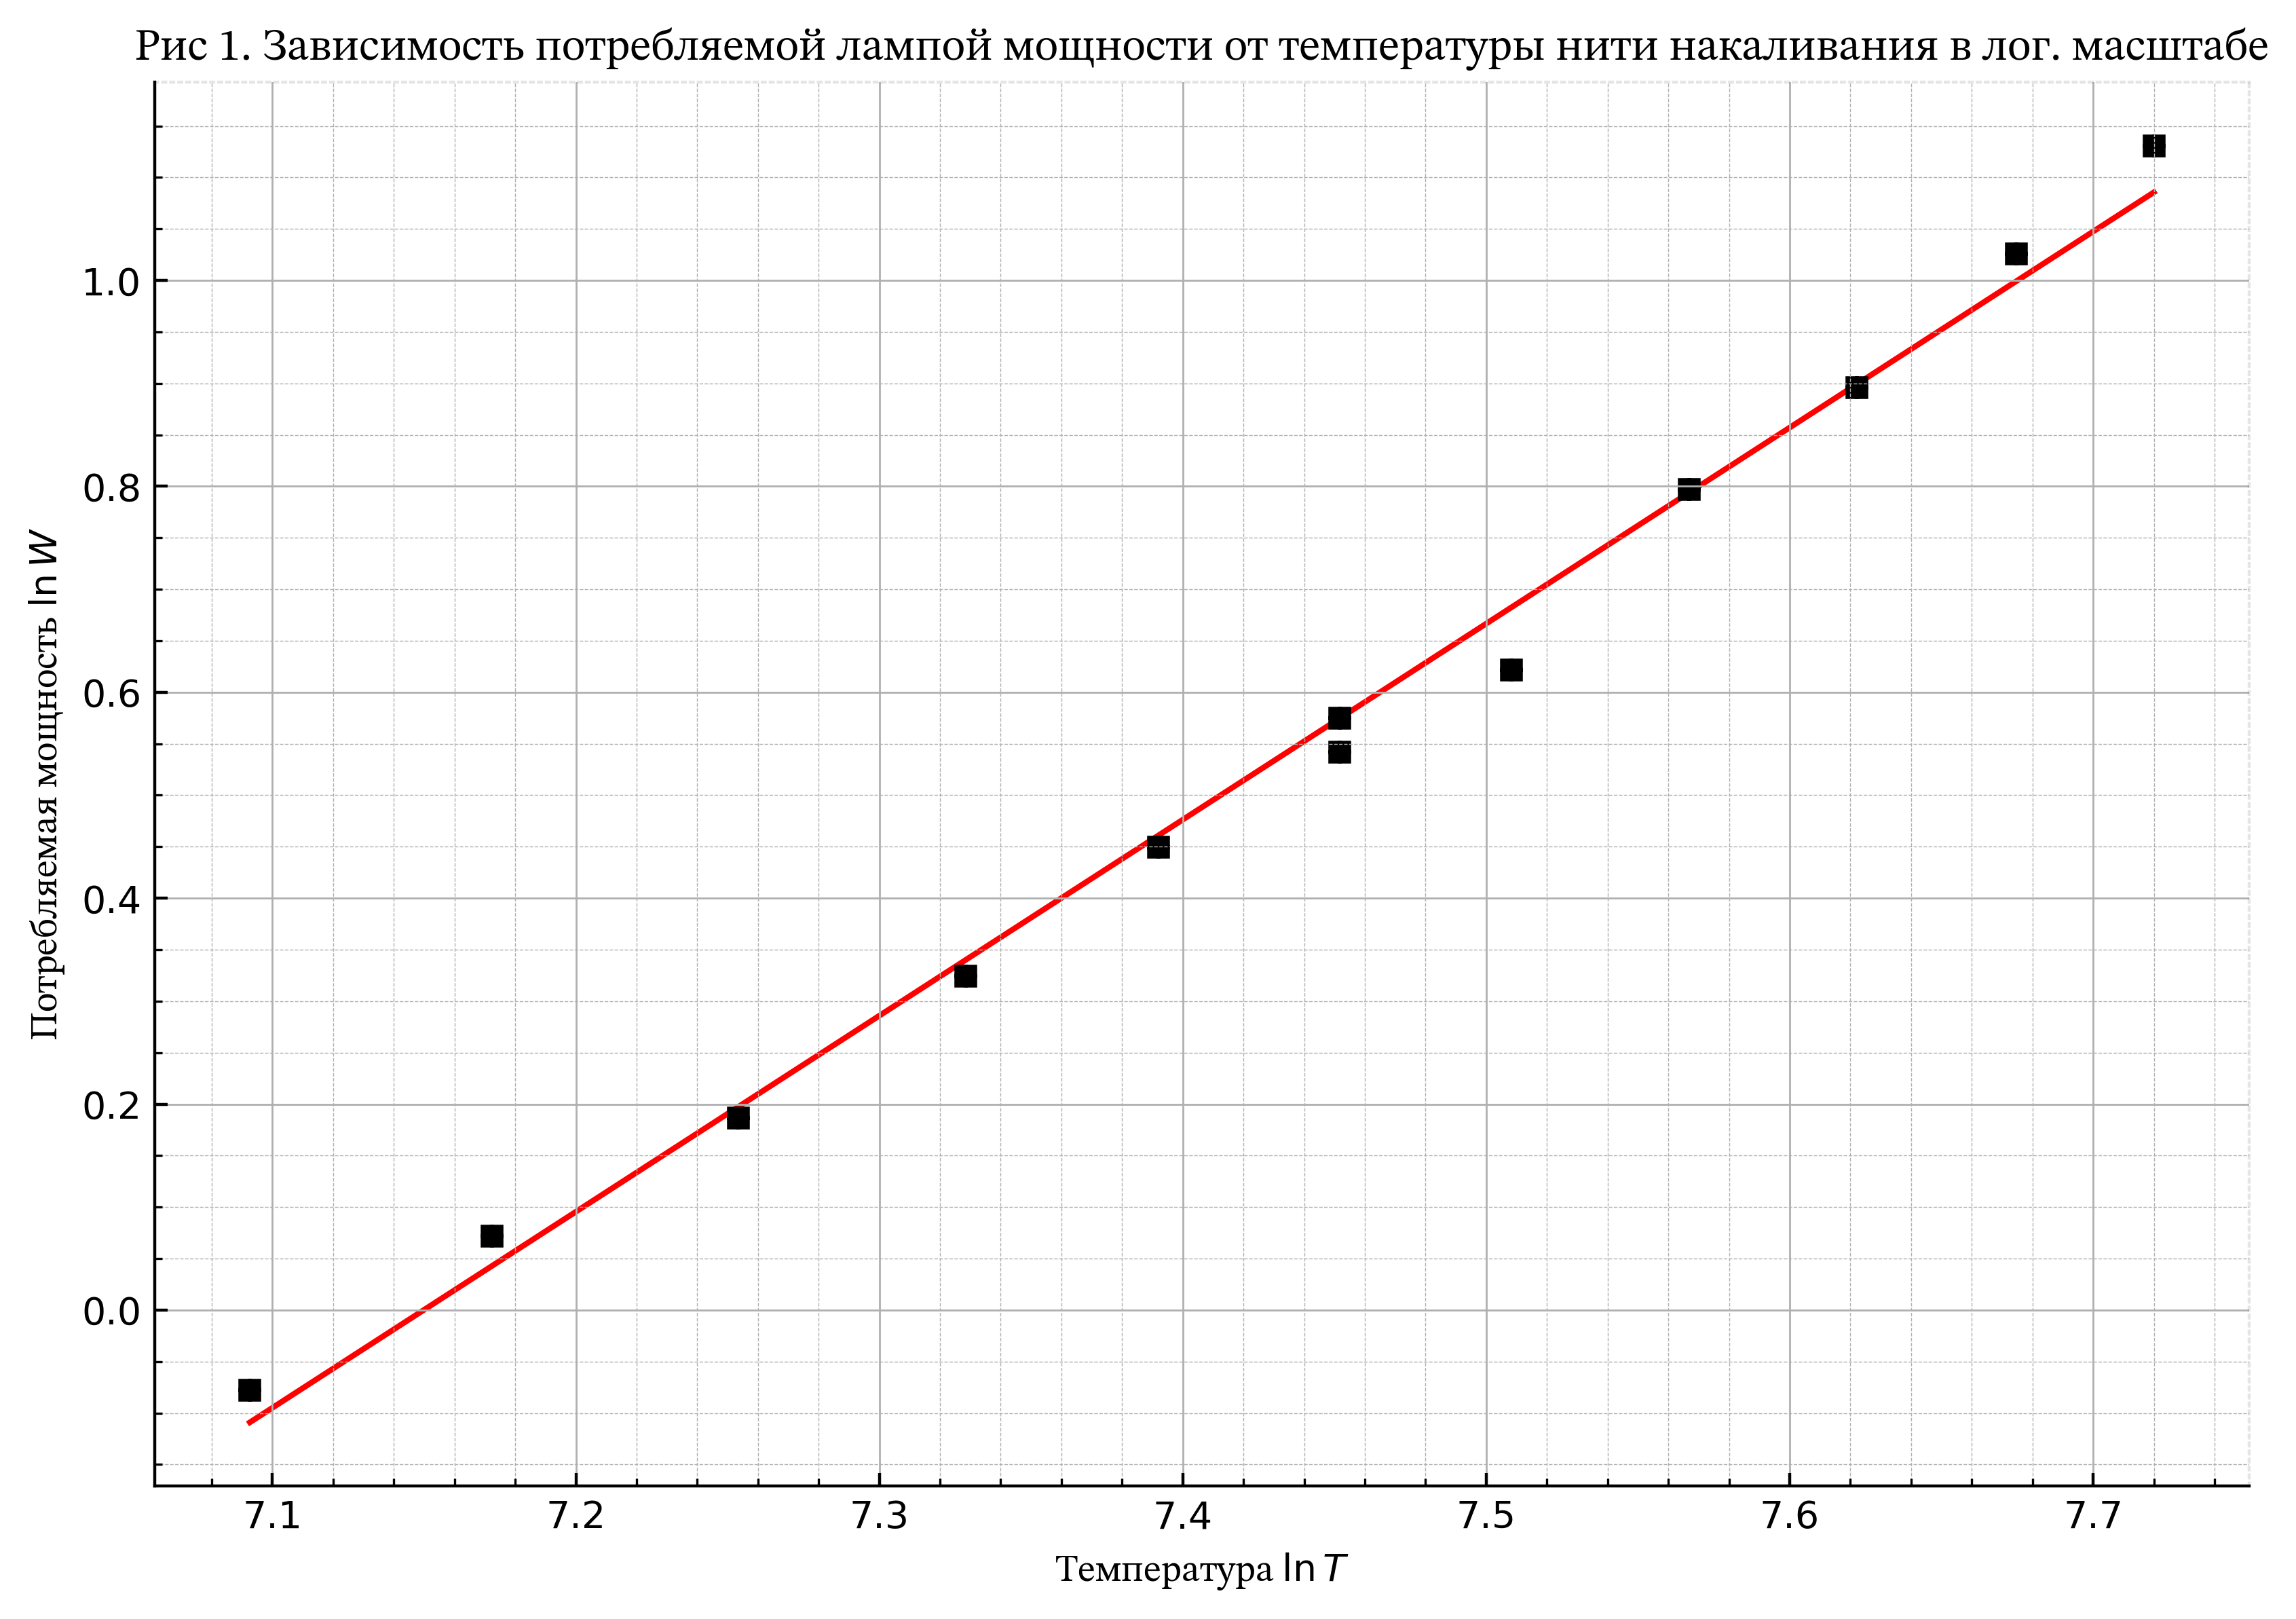

In [3]:
X = np.log( np.array( df['T, K'] ) ) # C -> K 
Y = np.log( np.array( W ) ) # W

fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
mg.set_grids(fig)
mg.set_title(ax, r'Зависимость потребляемой лампой мощности от температуры нити накаливания в лог. масштабе')
mg.set_label(ax, r'Температура $\ln{T}$', r'Потребляемая мощность $\ln{W}$')
k, s_k, b, s_b = mg.linls(X, Y)
mg.draw_errorbar(ax, X, Y)
mg.display_linls(ax)

In [4]:
Ws = np.array(W[8:])
epst= [0.236, 0.249, 0.249, 0.249]
Ts = [1933, 2043, 2153, 2253]
S = 5.0

sigmas = [ Ws[i] / epst[i] / S / (Ts[i]**4) for i in range(len(Ws)) ]
sigmas

[np.float64(1.3469267077158555e-13),
 np.float64(1.1293381201531031e-13),
 np.float64(1.0428488637277361e-13),
 np.float64(9.658118457330281e-14)]